# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width

50 samples for setosa, 50 samples for versicolor

   


(100, 2)


<bound method NDFrame.head of     sepal_length  sepal_width
0            7.0          3.2
1            5.1          3.7
2            5.9          3.2
3            5.0          3.4
4            6.2          2.2
..           ...          ...
95           5.1          2.5
96           5.3          3.7
97           5.0          3.3
98           5.5          2.6
99           5.8          4.0

[100 rows x 2 columns]>

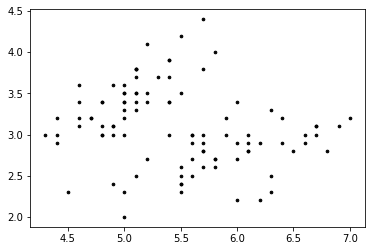

In [ ]:
# Load dataset and plot it

%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# Bring the file into the local Python environment.
df = pd.read_csv('simple_iris_dataset.csv')
df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)
print(X.shape)
df.head

(array([6.02666667, 5.01636364]), array([2.79111111, 3.35090909]))


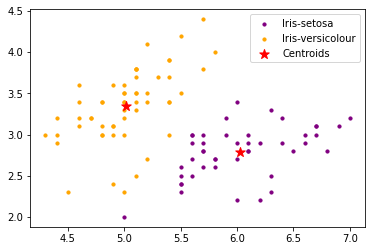

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'orange', label = 'Iris-versicolour')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', marker='*', label = 'Centroids')
centroid=(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1])
print(centroid)

plt.legend()

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(f"Algorithm Converges After {round(kmeans.inertia_)} iterations ")


Algorithm Converges After 5 iterations 


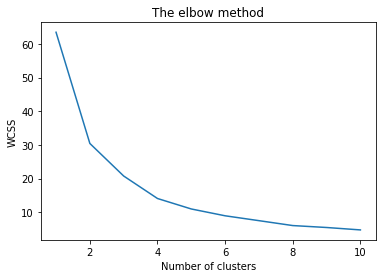

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()